https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('data/temps.csv')
# Actual column is the target
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
def conversor(x):
    return (x-32)*(5/9)

features['actual'] = features['actual'].apply(conversor)

In [3]:
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,7.222222,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,6.666667,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,5.000000,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,4.444444,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,6.666667,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    float64
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 32.8+ KB


In [5]:
# One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(features, drop_first=True) # Evitar la colinearidad de los datos
features = pd.get_dummies(features)


# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,7.222222,43,50,44,29,1,0,0,0,0,0,0
1,45.7,6.666667,41,50,44,61,0,0,1,0,0,0,0
2,45.8,5.000000,43,46,47,56,0,0,0,1,0,0,0
3,45.9,4.444444,44,48,46,53,0,1,0,0,0,0,0
4,46.0,6.666667,46,46,46,41,0,0,0,0,0,1,0


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    float64
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

### 3. Divide en train y test

In [7]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features 
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(train_features, train_labels)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [11]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [12]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.2 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

print('MAPE:', round(np.mean(mape), 2), '%.')

MAPE: 20.2 %.


In [14]:
mape

array([32.35294118, 10.34482759,  5.        , 17.64705882, 15.78947368,
       38.        , 18.86792453, 19.23076923,  9.09090909, 35.        ,
       24.13793103, 33.96226415, 41.66666667,  9.09090909,  2.7027027 ,
       23.33333333,  3.125     , 12.5       ,  9.52380952, 23.40425532,
        0.        ,  8.        ,  8.57142857, 20.        , 18.51851852,
       29.16666667, 18.18181818, 30.        , 44.11764706,  2.27272727,
       56.25      , 48.27586207, 50.        ,  4.08163265,  8.88888889,
       44.        , 34.61538462, 66.66666667,  2.77777778, 63.15789474,
       31.11111111, 12.5       ,  9.75609756, 52.63157895, 11.11111111,
       23.63636364, 11.53846154,  8.16326531, 11.53846154, 30.        ,
       23.52941176, 50.        ,  3.03030303,  6.25      , 13.15789474,
       12.12121212,  9.52380952, 28.        , 19.04761905, 14.28571429,
        8.57142857,  0.        , 28.57142857,  5.40540541, 21.73913043,
       30.55555556, 18.18181818,  5.40540541,  4.34782609, 75.  

### 7. Representa el árbol de decision

In [15]:
import matplotlib
matplotlib.__version__

'3.2.2'

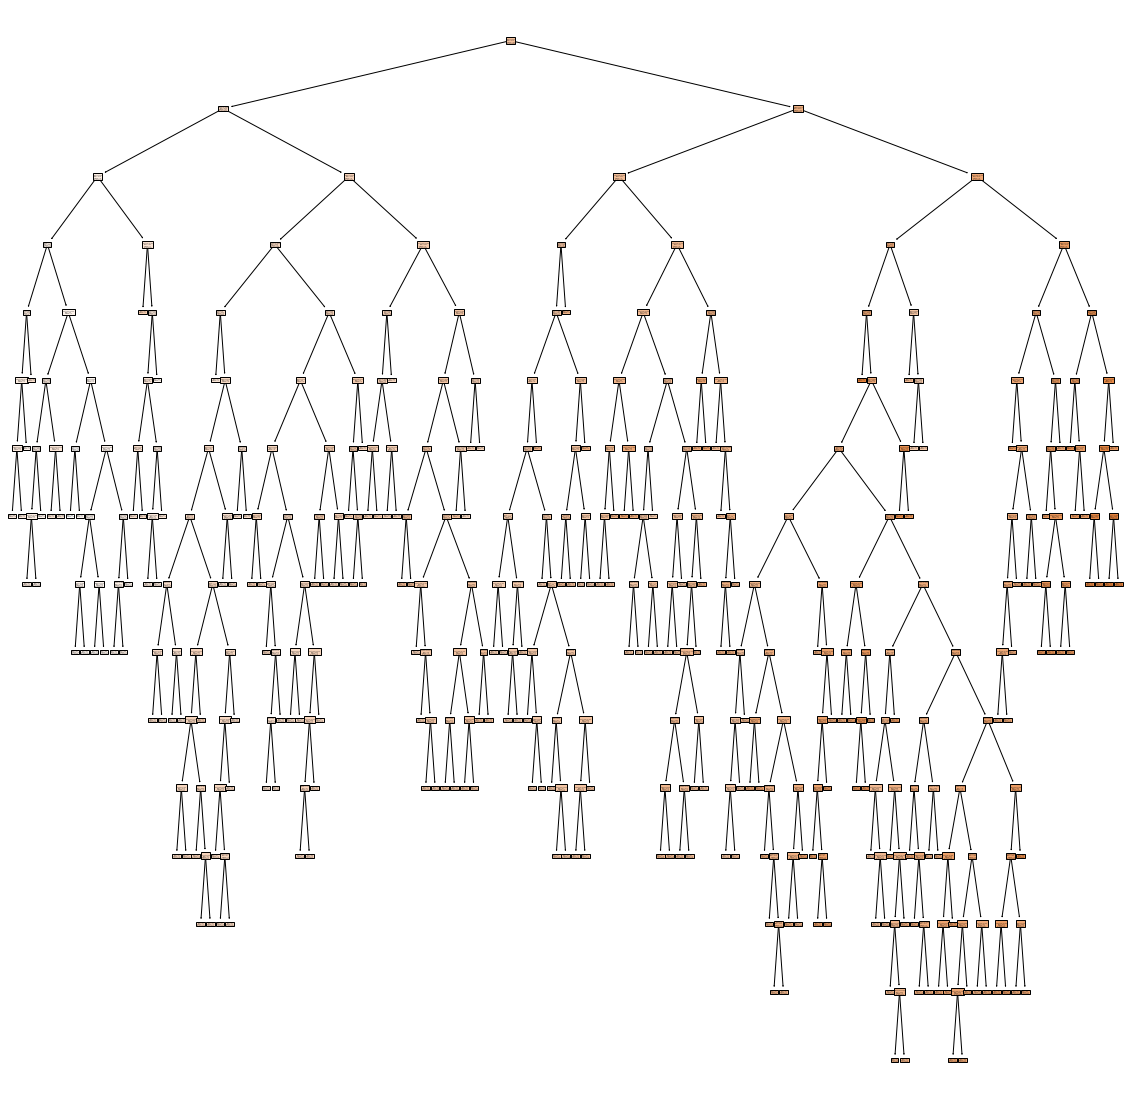

In [16]:
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [17]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [44]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.04 degrees.


In [45]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.39 degrees.


### 10. Vuelve a representar su árbol

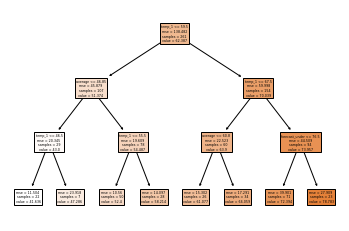

In [25]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [24]:
np.sum(dtr.feature_importances_)

1.0000000000000002

In [52]:
import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.091943
8,forecast_under,0.023367
7,forecast_acc,0.012052
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
